In [66]:
%matplotlib inline

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import scipy.stats as stats
import math

fig_size = [0,0]
fig_size[0] = 15
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
x = input("what is your name: ")
print(x +" is great")

what is your name: Tyler
Tyler is great


# Setting up the input distributions

This is where we set the discrete distribution of number of bags expected to be carried on by each passenger

In [4]:
import scipy.stats as stats

prob_zero_bags = 0.05 #5%
prob_pi_only = 0.1
prob_bag_only = 0.1
prob_pi_and_bag = 0.75

xk = np.arange(4)
pk = (prob_zero_bags, prob_pi_only, prob_bag_only, prob_pi_and_bag)

bag_num_dist = stats.rv_discrete(name='bag_num_dist', values=(xk, pk))

Setting up the personal item distribution.  At this point we can choose most any distribution we like and it will be charted below to verify that it looks as we would expect.  Right now we'll assume it's a normal distribution with mean and std. dev. and expand later.  We'll also set up min and max weights to cap both ends of the spectrum for use in steps later in the analysis

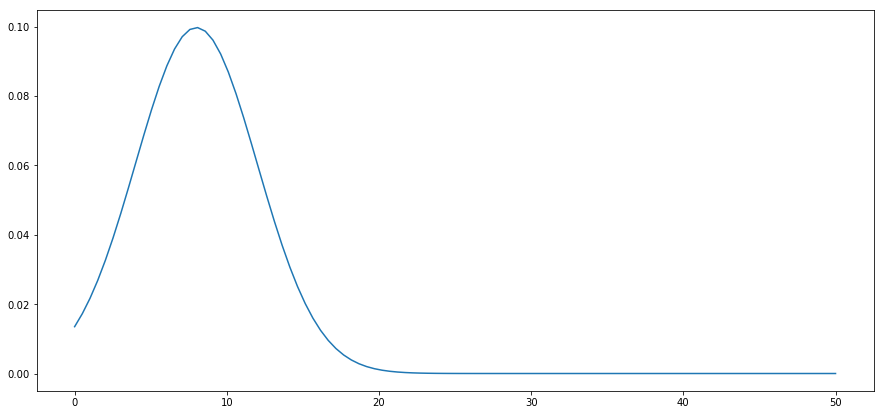

In [62]:


pi_min_wt = 1.0
pi_max_wt = 50.0
pi_average = 8
pi_std_dev = 4

x = np.linspace(0, 50, 100)

#build the distributiton
pi_dist = stats.norm(pi_average,pi_std_dev)

#setup the plot 
plt.plot(x,pi_dist.pdf(x))
plt.show()
    


Setting up the carry-on distribution.  We'll continue with the normal distributions for now to be expanded later

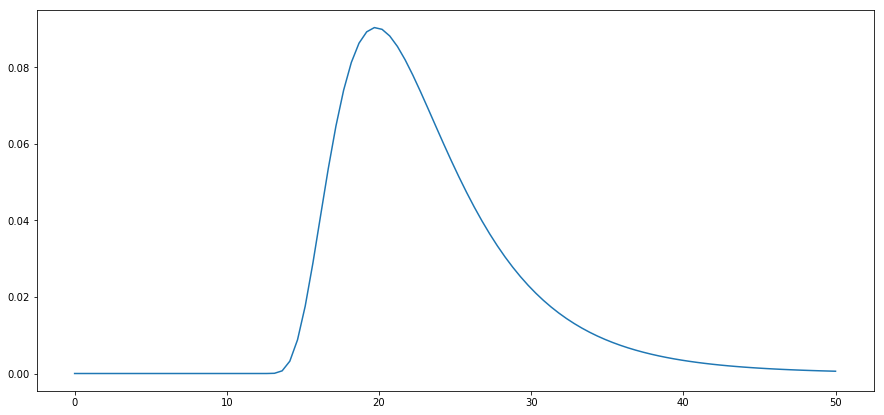

In [60]:
co_average = 20
co_std_dev = 10
co_min_wt = 1.0
co_max_wt = 50.0

#build the distributiton
co_dist = stats.lognorm(0.5,co_average-8,co_std_dev)

#setup the plot 
x = np.linspace(0, 50, 100)
plt.plot(x,co_dist.pdf(x))
plt.show()

A final step in the analysis is to choose the number of passengers we want analyzed for the sample. Here are some suggestions: 19, 50.  In this step we'll also add the number of times we'd like to run the simulation.

In [28]:
num_passengers = 50
num_sims = 1000

Now we build the simulation:

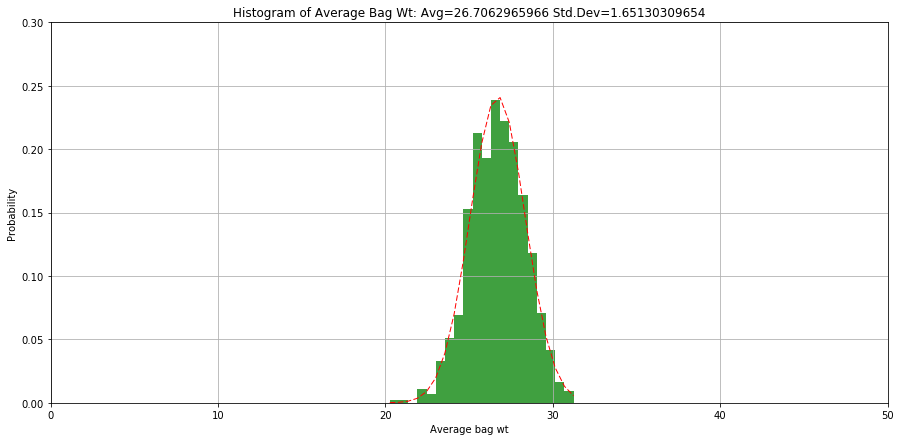

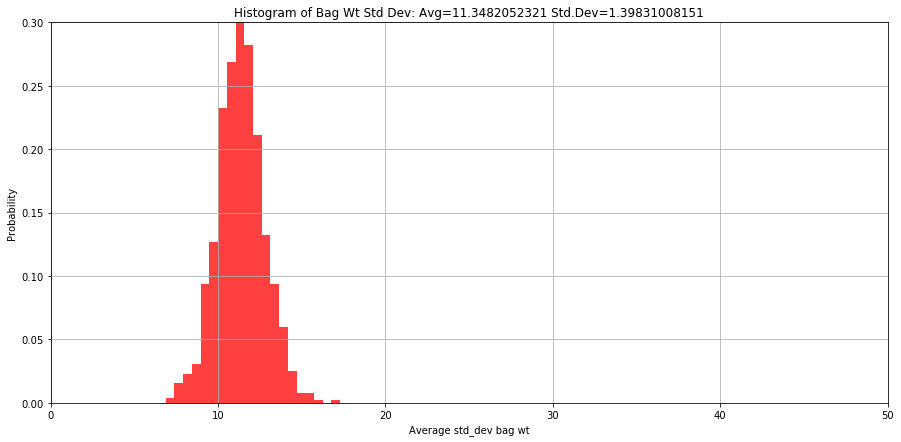

In [63]:
final_dist = np.zeros(num_sims)
final_dist_std = np.zeros(num_sims)

import random

for i in range(len(final_dist)):
    #set bag number array
    #num_passengers = random.randint(30,50)
    bag_num_array = bag_num_dist.rvs(size=num_passengers)
    #set pi array
    pi_array = pi_dist.rvs(size=num_passengers)
    #set co array
    co_array = co_dist.rvs(size=num_passengers)
    
    individual_wts = np.zeros(num_passengers)
    for j,x in enumerate(bag_num_array):
        if x==1:
            individual_wts[j] = pi_array[j]
        elif x==2:
            individual_wts[j] = co_array[j]
        elif x==3:
            individual_wts[j] = pi_array[j] + co_array[j]

    #get the average for this 'flight' and add it to the 
    final_dist[i] = np.mean(individual_wts)
    final_dist_std[i] = np.std(individual_wts)
    
#now that we have the average bag weight for every flight we can look at the distribution
avg = np.mean(final_dist)
std_dev = np.std(final_dist)

avg_std = np.mean(final_dist_std)
std_dev_std = np.std(final_dist_std)


# the histogram of the data
n, bins, patches = plt.hist(final_dist, 20, normed=1, facecolor='green', alpha=0.75)


# add a 'best fit' line
y = mlab.normpdf( bins, avg, std_dev)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Average bag wt')
plt.ylabel('Probability')
plt.title('Histogram of Average Bag Wt: Avg=%s Std.Dev=%s'%(avg,std_dev))
plt.axis([0, 50, 0, 0.3])
plt.grid(True)

plt.show()

n, bins, patches = plt.hist(final_dist_std, 20, normed=1, facecolor='red', alpha=0.75)

plt.xlabel('Average std_dev bag wt')
plt.ylabel('Probability')
plt.title('Histogram of Bag Wt Std Dev: Avg=%s Std.Dev=%s'%(avg_std,std_dev_std))
plt.axis([0, 50, 0, 0.3])
plt.grid(True)

plt.show()
        
            
    
    